In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [52]:
df = pd.read_csv('spotify_data.zip')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [54]:
def clean_outliers(df_aux, columns: list)->pd.DataFrame:
    """
    Función que elimina los valores atípicos de un dataframe en base a los cuartiles.
    
    Args: df_aux: DataFrame a limpiar.
        columns: Lista de columnas a limpiar.
    Returns: DataFrame sin valores atípicos
    """
    for column in columns:
        Q1 = df_aux[column].quantile(0.25)
        Q3 = df_aux[column].quantile(0.75)
        IQR = Q3 - Q1
        df_aux = df_aux[(df_aux[column] >= Q1-1.5*IQR) & (df_aux[column] <= Q3 + 1.5*IQR)]
    return df_aux

In [55]:
df = clean_outliers(df, ['loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'danceability', 'energy'])

In [56]:
def normalize_data(df:pd.DataFrame, columns:list[str]):
    # restar la media y dividir entre la desviacion tipica
    for column in columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

In [57]:
df["loudness"] = StandardScaler().fit_transform(df[["loudness"]])

In [58]:
df = normalize_data(df, ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence"])

In [59]:
# df = df.sample(frac=0.3, random_state=42)

In [61]:
df_aux = df[df["popularity"] >= 50]

### Regresion

In [71]:
X, y = df_aux.drop(columns={"Unnamed: 0", "popularity", "artist_name", "track_name", "track_id", "genre", "duration_ms", "time_signature", "key", "mode", "tempo"}, axis=1), df_aux['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=15)

In [64]:
X_train

,year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
838735,2005,0.653244,0.092183,0.483433,-0.789793,-0.778212,-0.680122,-0.761285,1.381445
40643,2012,1.634841,-0.064693,1.003894,-0.101393,0.618427,-0.333984,-0.078991,1.848226
43793,2012,0.601581,0.913717,0.866902,-0.655173,-0.803780,-0.680152,-0.249564,1.460497
542085,2022,-0.781839,0.315112,0.860700,-0.300264,-0.846104,-0.680143,2.174375,-1.155738
232777,2016,-1.516601,-1.790326,-1.810908,-0.792853,2.068309,0.468114,-0.572756,-1.193382
...,...,...,...,...,...,...,...,...,...
801565,2004,1.164133,-1.418778,-0.218515,-0.373693,0.425912,-0.680149,-0.411160,-0.338871
1057606,2009,-0.483342,0.459603,0.375835,-0.309443,-0.667215,0.133203,-0.581734,-1.432043
119771,2014,-0.942568,-1.030717,-0.266246,-0.083035,-0.365206,-0.680109,0.800809,-0.839531
272539,2017,-0.035596,0.447218,0.418443,-0.358395,-0.852293,-0.680129,-0.644576,-0.432980


In [ ]:
epsilon = 100
max_iter = 500

model = HuberRegressor(epsilon=epsilon, max_iter=max_iter)
model.fit(X_train, y_train) 
mse_SVR = mse(y_test,model.predict(X_test))
print(mse_SVR)

In [66]:
#Librerías
from sklearn.ensemble import RandomForestRegressor
#Inicializamos modelo y parámetros
n_estimators = 200 #Estimadores del modelo
criterion = 'squared_error' #Forma de calcular el error
max_depth = None #Límite de profundidad de los árboles
min_samples_split = 2 #Criterio de parada de profundidad
verbose = 1 #Información devuelta por el método
#Instanciamos el modelo
model = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, verbose=verbose)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, y_train)
mse_RF = mse(y_test,model.predict(X_test))
print(mse_RF)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   13.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   53.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


47.631559365748736


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s


In [67]:
#Librerías
import xgboost as xgb
#Inicializamos modelo y parámetros
params = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "reg:squarederror", "nthread":2}
num_boost_round = 10
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)
#Instanciamos el modelo, entrenamos y elaboramos predicciones
model = xgb.train(params = params, dtrain = train_data, num_boost_round=num_boost_round)
mse_XGB = mse(y_test,model.predict(test_data))
print(mse_XGB)

46.79619859919413


In [68]:
#Librerías
from sklearn import svm
#Inicializamos modelo y parámetros
C = 1 #Parámetro regularizador
kernel = 'rbf' #Núcleo transformador
#Instanciamos el modelo
model = svm.SVR(C = C, kernel = kernel)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, y_train)
mse_SVR = mse(y_test,model.predict(X_test))
print(mse_SVR)

51.059615593146546


Text(0.5, 0, 'Modelo')

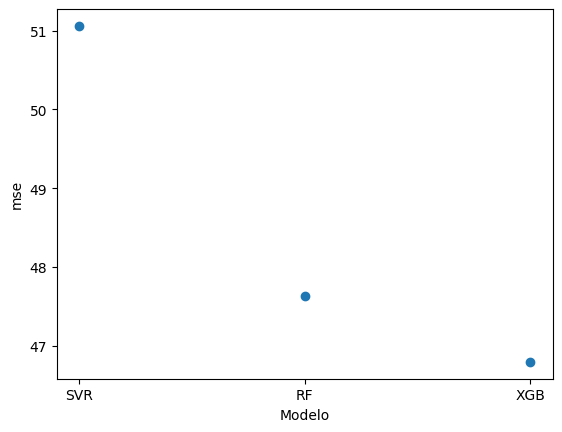

In [69]:
mse = [mse_SVR, mse_RF, mse_XGB]
plt.scatter(['SVR', 'RF', 'XGB'], mse)
plt.ylabel('mse')
plt.xlabel('Modelo')

### Clasificacion

In [10]:
from sklearn.metrics import classification_report

In [11]:
def popularity(x):
    if 25 > x >= 0 :
        return "Baja popularidad"
    elif 50 > x >= 25:
        return "Popularidad media"
    else:
        return "Alta popularidad" 

In [12]:
def popularity(x):
    if 50 > x >= 0 :
        return "Baja popularidad"
    else:
        return "Alta popularidad"

In [13]:
df["popularity_target"] = df["popularity"].apply(lambda x: popularity(x))

In [14]:
df["popularity_target"].value_counts()

popularity_target
Baja popularidad    849109
Alta popularidad     41044
Name: count, dtype: int64

In [15]:
X, y = df.drop(columns={"Unnamed: 0", "popularity", "artist_name", "track_name", "track_id", "genre", "duration_ms", "time_signature", "key", "mode", "tempo", "popularity_target"}, axis=1), df['popularity_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=15)

In [16]:
from sklearn.linear_model import LogisticRegression
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(max_iter =100)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\NITROPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                  precision    recall  f1-score   support

Alta popularidad       0.00      0.00      0.00     10325
Baja popularidad       0.95      1.00      0.98    212214

        accuracy                           0.95    222539
       macro avg       0.48      0.50      0.49    222539
    weighted avg       0.91      0.95      0.93    222539



In [17]:
from sklearn.neighbors import KNeighborsClassifier
#Parámetros
weights = 'distance'
p = 2
n_neighbours = 10
#Modelo
clf = KNeighborsClassifier(n_neighbors = n_neighbours, weights = weights, p = p)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

Alta popularidad       0.30      0.03      0.05     10325
Baja popularidad       0.95      1.00      0.98    212214

        accuracy                           0.95    222539
       macro avg       0.63      0.51      0.51    222539
    weighted avg       0.92      0.95      0.93    222539



In [18]:
from sklearn.naive_bayes import GaussianNB
#Tratamos datos como pd.DataFrame
#Modelo
nbmodelo = GaussianNB()

nbmodelo.fit(X_train, y_train)
y_pred = nbmodelo.predict(X_test)

print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

Alta popularidad       0.33      0.01      0.02     10325
Baja popularidad       0.95      1.00      0.98    212214

        accuracy                           0.95    222539
       macro avg       0.64      0.51      0.50    222539
    weighted avg       0.92      0.95      0.93    222539



In [19]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_preds = RFC.predict(X_test)
print(classification_report(y_test, y_preds))

                  precision    recall  f1-score   support

Alta popularidad       0.45      0.01      0.03     10325
Baja popularidad       0.95      1.00      0.98    212214

        accuracy                           0.95    222539
       macro avg       0.70      0.51      0.50    222539
    weighted avg       0.93      0.95      0.93    222539



In [20]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=357, validation_fraction=0.1,n_iter_no_change=5, tol=0.01)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test) #comentario prueba
print(classification_report(y_test, y_pred, zero_division=0))

                  precision    recall  f1-score   support

Alta popularidad       0.00      0.00      0.00     10325
Baja popularidad       0.95      1.00      0.98    212214

        accuracy                           0.95    222539
       macro avg       0.48      0.50      0.49    222539
    weighted avg       0.91      0.95      0.93    222539

